# Neural network practice

Lets create 2 layer neural network and train it with public dataset

In [31]:
# !pip install torchvision
import numpy as np
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [32]:
'''
MNIST is simple image open source dataset with 0-9 written digits. Each image has (28,28) shape
'''
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [33]:
'''
MNIST properties
'''
print('***** Dataset info ******')
print(mnist_trainset)
print(mnist_testset)
print()
print('***** Single element in the dataset ******')
print(f'X sample is : {mnist_trainset[0][0]}')
print(f'y sample is : {mnist_trainset[0][1]}')

***** Dataset info ******
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

***** Single element in the dataset ******
X sample is : <PIL.Image.Image image mode=L size=28x28 at 0x16D1760B048>
y sample is : 5


# Visualize

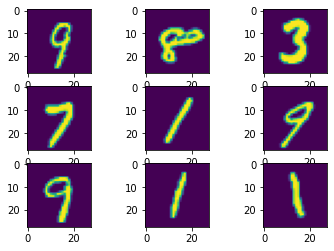

In [34]:
'''
Visualize few images from the dataset
'''
row_number = 3
column_number = 3
inds = np.random.randint(0, 60000, row_number*column_number)
imgs = [mnist_trainset[i][0] for i in inds]
fig, axes = plt.subplots(row_number,column_number)
for i in range(row_number):
    for j in range(column_number):
        axes[i][j].imshow(imgs[i*column_number + j])

In [35]:
'''
Preprocess images to make them numpy arrays for the neural network
YOUR CODE BELLOW
'''
def preprocess_images(dataset):
    '''
    param dataset: MNIST dataset
    
    return parameter should be numpy.array
    '''
    X = []
    Y = []
    for img in dataset:
      X.append(np.array(img[0]).flatten())
      Y.append(np.array(img[1]))

    X = np.array(X)
    Y = np.array(Y)
    return X, Y

X_trainset, y_trainset = preprocess_images(mnist_trainset)
X_test, y_test = preprocess_images(mnist_testset)
print(X_trainset.shape)


(60000, 784)


In [36]:
# Check if the preprocessing done correct
assert X_trainset.shape == (60000, 784)
assert y_trainset.shape == (60000,)
assert X_test.shape == (10000, 784)
assert y_test.shape == (10000,)

# Define your model

You need to create 2 layer fully connected neural network. Activation function will be ReLU.

In [119]:
from neu_net import TwoLayerNet
from time import time

In [120]:
'''
You need to define your parameters for your network
YOUR CODE BELLOW
'''
input_size = 784
hidden_size = 100
output_size = 10

nn_model = TwoLayerNet(input_size, hidden_size, output_size)
y_pred = nn_model.predict(X_trainset)
print(y_pred)

(60000, 10)
[[ 30469.2866553    9197.5739063  -12817.94882364 ... -10303.35798624
    3487.27279466  -4552.8583214 ]
 [ 28828.81346174 -16201.25946366   1111.83838288 ...  -6393.36058236
    5366.63309032   5726.90622502]
 [ 12027.3702653    5106.68290582  -1643.82512044 ...  -1974.99543627
   -3986.38047611  21463.61463983]
 ...
 [ 29969.29050967  10714.49160823   2696.5683533  ...  -7044.29130354
   -1563.48451759 -15988.18492105]
 [  5576.21686804 -12608.51611685  11588.22595184 ...   1481.25189189
   11569.23396017   4928.57429312]
 [ 21184.11440123   1775.08782154  12766.35331101 ...  -4553.31114455
   -5480.14667196  -4046.36970513]]


# Train model

Below you will start to train your model

In [ ]:
'''
YOUR CODE BELLOW
'''
def train_val_split(X, y, ratio=0.8):
    '''
    param X: trainset features
    param y: trainset labels
    param ratio: Train-val split ratio
    
    return splitted matricies as numpy.array's
    '''
    X_train, y_train, X_val, y_val = None, None, None, None
    
    return X_train, y_train, X_val, y_val

In [ ]:
 X_train, y_train, X_val, y_val = train_val_split(X,y)

In [ ]:
learning_rate = 1e-4
batch_size = 4
num_iters = 1000

In [ ]:
t1 = time()
results = nn_model.train(X_train, y_train, X_val, y_val, learning_rate, batch_size, num_iters)
t2 = timie()
print(f'It took {t2-t1} seconds to train model')

# Results

Lets plot loss, train accuracy and validation accuracy

In [ ]:
plt.plot(np.arange(len(results['loss_history'])), results['loss_history'])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
plt.plot(np.arange(len(results['train_acc_history']))*100, results['train_acc_history'],label='train')
plt.plot(np.arange(len(results['val_acc_history']))*100, results['val_acc_history'], label='val')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Test model

Finally we can test trained model on test dataset

In [ ]:
y_pred = nn_model.predict(X_test)
test_acc = (y_pred == y_test).mean()*100
print(f'Your model test accuracy is : {test_acc}%')